<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Clustering_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
import math

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/BancoDeDados.csv')
data.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [3]:
data.isnull().sum()

amostra                    0
id_cliente                 0
id_unico_cliente           0
item_id                    0
cep_cliente                0
cidade_cliente             0
estado_cliente             0
id_pedido                  0
status_pedido              0
horario_pedido             0
pedido_aprovado           14
pedido_entregador       1213
pedido_entregue         2515
data_estimada              0
id_vendedor                0
preco                      0
frete                      0
pagamento_sequencial       0
pagamento_tipo             0
pagamento_prestacoes       0
pagamento_valor            0
review                     0
categoria                  0
categoria_ingles           0
cep_vendedor               0
cidade_vendedor            0
estado_vendedor            0
dtype: int64

In [4]:
data.pedido_aprovado.isna().sum()

14

In [5]:
dataset = data.dropna()

In [6]:
dataset.isnull().sum()

amostra                 0
id_cliente              0
id_unico_cliente        0
item_id                 0
cep_cliente             0
cidade_cliente          0
estado_cliente          0
id_pedido               0
status_pedido           0
horario_pedido          0
pedido_aprovado         0
pedido_entregador       0
pedido_entregue         0
data_estimada           0
id_vendedor             0
preco                   0
frete                   0
pagamento_sequencial    0
pagamento_tipo          0
pagamento_prestacoes    0
pagamento_valor         0
review                  0
categoria               0
categoria_ingles        0
cep_vendedor            0
cidade_vendedor         0
estado_vendedor         0
dtype: int64

In [7]:
def plot_per(st, data):
    plt.figure(figsize=(12,8))
    g = sns.countplot(x = st, data = data, orient ='h')

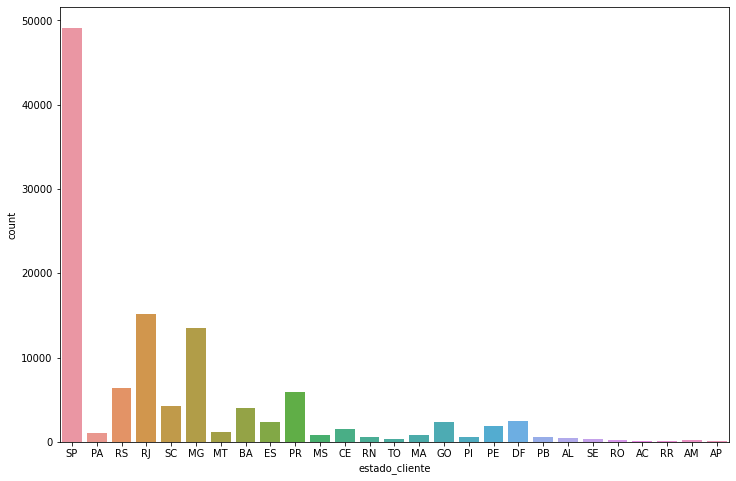

In [8]:
plot_per('estado_cliente', data)

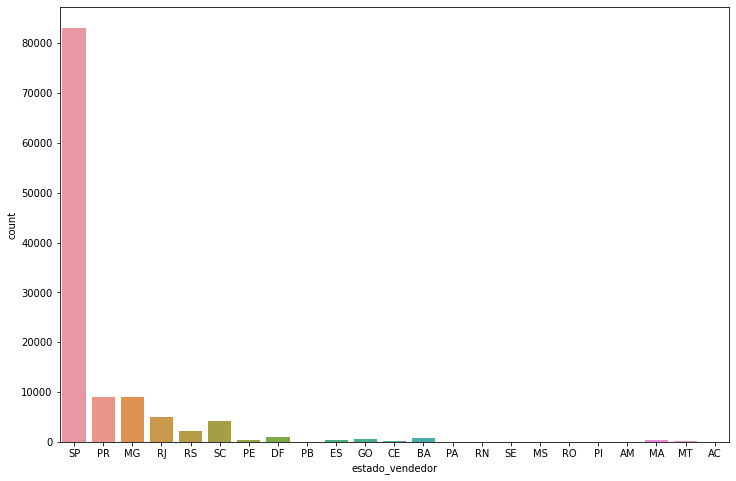

In [9]:
plot_per('estado_vendedor', data)

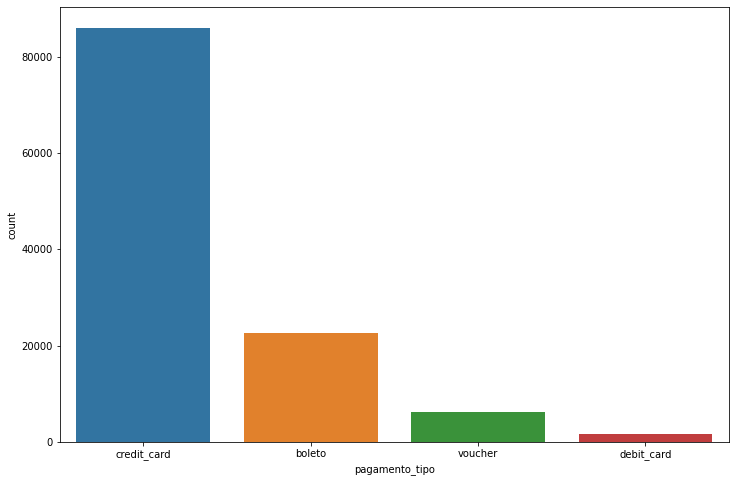

In [10]:
plot_per('pagamento_tipo', data)

# Recency

In [11]:
data_olist = dataset[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]
data_compra = dataset.groupby('id_unico_cliente').horario_pedido.max().reset_index()
data_compra.columns = ['id_unico_cliente', 'DataMaxCompra']
data_compra['DataMaxCompra'] = pd.to_datetime(data_compra.DataMaxCompra)

In [12]:
data_compra['recency'] = (data_compra.DataMaxCompra.max() - data_compra.DataMaxCompra).dt.days

In [13]:
data_user = pd.merge(data_olist, data_compra[['id_unico_cliente', 'recency']], on='id_unico_cliente')
data_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,293
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,293
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,206


In [14]:
# Calculate clusters
def calc_clusters(data, n):
    wcss = []
    for k in range(1,n):
        kmeans = KMeans(n_clusters = k).fit(X=data)
        data['clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

In [15]:
data_recency = data_user[['recency']]

In [16]:
sq_sum = calc_clusters(data_recency, 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

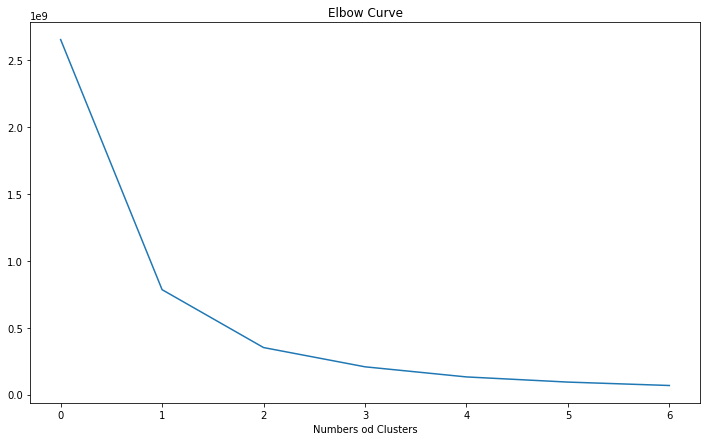

In [17]:
plt.figure(figsize=(12,7))
plt.plot(sq_sum)
plt.title('Elbow Curve')
plt.xlabel('Numbers od Clusters');

In [18]:
# function to define the best number of clusters
def num_cluster_optmi(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss) - 1]
    distance = []

    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        num = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        den = math.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        distance.append(num/den)
    return distance.index(max(distance)) +2

In [19]:
n = num_cluster_optmi(sq_sum)
n

5

In [20]:
kmeans = KMeans(n_clusters=5)
data_user['cluster_recency'] = kmeans.fit_predict(data_recency)
data_user.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency,cluster_recency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,4
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,293,3
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,293,3
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,4
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,206,3


In [21]:
groupby_clusters = data_user.groupby('cluster_recency')['recency'].mean().reset_index()
groupby_clusters.head()

,cluster_recency,recency
0,0,47.749349
1,1,377.683158
2,2,151.609881
3,3,260.056878
4,4,510.948635


In [22]:
sorted_clusters = groupby_clusters.sort_values(by='recency', ascending=False).\
reset_index(drop=True)

In [23]:
sorted_clusters

,cluster_recency,recency
0,4,510.948635
1,1,377.683158
2,3,260.056878
3,2,151.609881
4,0,47.749349


In [24]:
sorted_clusters['index'] = sorted_clusters.index
sorted_clusters

,cluster_recency,recency,index
0,4,510.948635,0
1,1,377.683158,1
2,3,260.056878,2
3,2,151.609881,3
4,0,47.749349,4


In [25]:
merge_cluster = pd.merge(data_user,sorted_clusters[['cluster_recency', 'index']],on='cluster_recency')

In [26]:
merge_cluster

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency,cluster_recency,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,4,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,4,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,523,4,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,470,4,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,528,4,0
...,...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,8,0,4
114047,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,36,0,4
114048,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,36,0,4
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,31,0,4


In [27]:
data_final = merge_cluster.drop(['cluster_recency'], axis = 1)

In [28]:
data_final

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,523,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,470,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,528,0
...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,8,4
114047,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,36,4
114048,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,36,4
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,31,4


In [29]:
data_final.columns = [['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco','recency', 'cluster_recency']]

In [30]:
data_final

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency,cluster_recency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,523,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,470,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,528,0
...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,8,4
114047,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,36,4
114048,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,36,4
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,31,4


In [31]:
def cluster_sort(cluster_name, target_name, data, bool):
    groupby_clusters = data_user.groupby(cluster_name)[target_name].mean().reset_index()
    sorted_clusters = groupby_clusters.sort_values(by=target_name, ascending=bool).reset_index(drop=True)
    sorted_clusters['index'] = sorted_clusters.index
    merge_cluster = pd.merge(data_user,sorted_clusters[[cluster_name, 'index']],on=cluster_name)
    remove_index = merge_cluster.drop([cluster_name], axis = 1)
    data_final = remove_index.rename(columns={'index':cluster_name})
    return data_final

In [32]:
data_user_2 = cluster_sort('cluster_recency', 'recency', data_user, False)
data_user_2

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency,cluster_recency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,523,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,470,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,528,0
...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,8,4
114047,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,36,4
114048,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,36,4
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,31,4


In [33]:
data_user_2.groupby('cluster_recency')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_recency,,,,,,,,
0,13959.0,510.948635,49.579715,445.0,470.0,504.0,542.0,694.0
1,18959.0,377.683158,35.432929,319.0,347.0,377.0,407.0,444.0
2,27093.0,260.056878,31.249307,206.0,231.0,265.0,281.0,318.0
3,29855.0,151.609881,31.017707,100.0,124.0,152.0,179.0,205.0
4,24185.0,47.749349,27.418012,0.0,23.0,44.0,72.0,99.0


# Frequency

In [34]:
data_frequency = dataset.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
data_frequency.columns = ['id_unico_cliente', 'frequency']
data_frequency

,id_unico_cliente,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
92058,fffcf5a5ff07b0908bd4e2dbc735a684,2
92059,fffea47cd6d3cc0a88bd621562a9d061,1
92060,ffff371b4d645b6ecea244b27531430a,1
92061,ffff5962728ec6157033ef9805bacc48,1


In [35]:
data_user_2 = pd.merge(data_user_2, data_frequency, on='id_unico_cliente')
data_user_2

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency,cluster_recency,frequency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,523,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,470,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,528,0,1
...,...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,8,4,1
114047,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,36,4,2
114048,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,36,4,2
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,31,4,1


In [36]:
data_frequency = data_user_2[['frequency']]
kmeans = KMeans(n_clusters=5)
data_user_2['frequency_cluster'] = kmeans.fit_predict(data_frequency)
data_user_2

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency,cluster_recency,frequency,frequency_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,523,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,470,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,528,0,1,0
...,...,...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,8,4,1,0
114047,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,36,4,2,0
114048,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,36,4,2,0
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,31,4,1,0


# Revenue

In [37]:
data_revenue = dataset.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
data_revenue.columns = ['id_unico_cliente', 'revenue']
data_user_3 = pd.merge(data_user_2, data_revenue, on='id_unico_cliente')
data_user_3

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recency,cluster_recency,frequency,frequency_cluster,revenue
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,469,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,478,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,523,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,470,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,528,0,1,0,148.33
...,...,...,...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,8,4,1,0,314.32
114047,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,36,4,2,0,169.26
114048,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,36,4,2,0,169.26
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,31,4,1,0,77.50


In [38]:
data_payment = data_user_3[['revenue']]
kmeans = KMeans(n_clusters=5)
data_user_3['cluster_revenue'] = kmeans.fit_predict(data_payment)

In [39]:
data_user_3.columns

Index(['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco',
       'recency', 'cluster_recency', 'frequency', 'frequency_cluster',
       'revenue', 'cluster_revenue'],
      dtype='object')

In [40]:
data_final = data_user_3[['id_unico_cliente', 'recency',
                           'cluster_recency', 'frequency',
                           'frequency_cluster', 'revenue',
                           'cluster_revenue']]

In [41]:
data_final

,id_unico_cliente,recency,cluster_recency,frequency,frequency_cluster,revenue,cluster_revenue
0,861eff4711a542e4b93843c6dd7febb0,469,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,478,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,523,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,470,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,528,0,1,0,148.33,0
...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,8,4,1,0,314.32,0
114047,8d80e477643ec569b24592ce3d9dfc4c,36,4,2,0,169.26,0
114048,8d80e477643ec569b24592ce3d9dfc4c,36,4,2,0,169.26,0
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,31,4,1,0,77.50,0


In [42]:
data_final['punctuation'] = data_user_3.cluster_recency +\
data_user_3.frequency_cluster +\
data_user_3.cluster_revenue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
data_final.punctuation.max()

12

In [44]:
data_final['segment'] = 'inative'
data_final.loc[data_final.punctuation >= 3, 'segment'] = 'Bronze'
data_final.loc[data_final.punctuation >= 7, 'segment'] = 'Silver'
data_final.loc[data_final.punctuation >= 9, 'segment'] = 'Gold'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [45]:
data_final

,id_unico_cliente,recency,cluster_recency,frequency,frequency_cluster,revenue,cluster_revenue,punctuation,segment
0,861eff4711a542e4b93843c6dd7febb0,469,0,1,0,146.87,0,0,inative
1,3c799d181c34d51f6d44bbbc563024db,478,0,1,0,140.61,0,0,inative
2,567ab47ca4deb92d46dbf54dce07d0a7,523,0,1,0,142.05,0,0,inative
3,f40ab89b622248b7ca125af4b486b887,470,0,1,0,155.70,0,0,inative
4,749943913a9851a39c9baf51877fbab6,528,0,1,0,148.33,0,0,inative
...,...,...,...,...,...,...,...,...,...
114046,c5da6424f1f5decedef8672a1a0103e1,8,4,1,0,314.32,0,4,Bronze
114047,8d80e477643ec569b24592ce3d9dfc4c,36,4,2,0,169.26,0,4,Bronze
114048,8d80e477643ec569b24592ce3d9dfc4c,36,4,2,0,169.26,0,4,Bronze
114049,8c3c961a52bb5a0ffbce1d4e6d25cd67,31,4,1,0,77.50,0,4,Bronze


In [46]:
data_final.segment.value_counts()

Bronze     54374
inative    52038
Silver      6067
Gold        1572
Name: segment, dtype: int64

In [47]:
# data_final.to_csv('data_final')

In [48]:
def plot_segment(x, y, data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=x, y=y, hue='segment', data=data, size='segment', sizes=(50,150),size_order=['Bronze', 'Silver', 'Gold', 'inative'])
    plt.show()

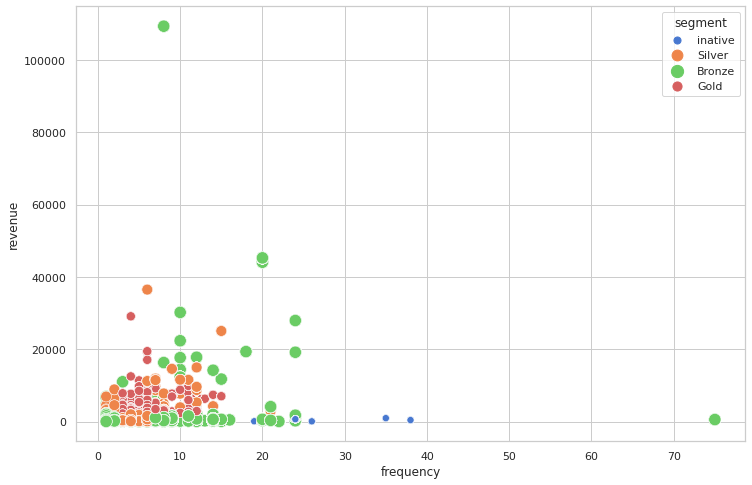

In [49]:
plot_segment('frequency', 'revenue', data_final)

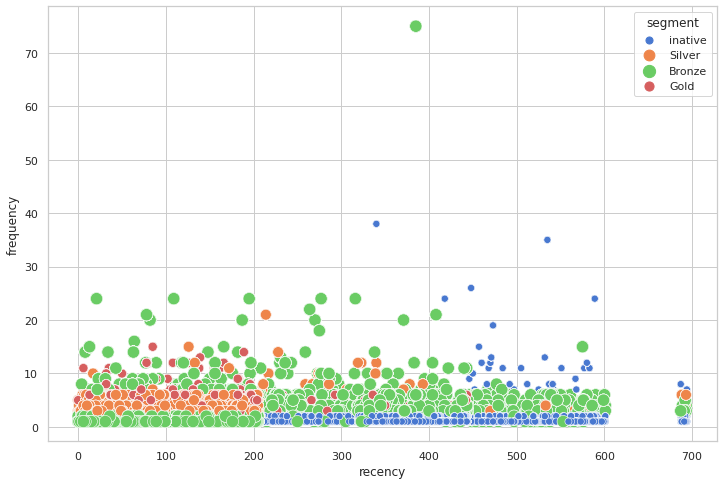

In [50]:
plot_segment('recency', 'frequency', data_final)

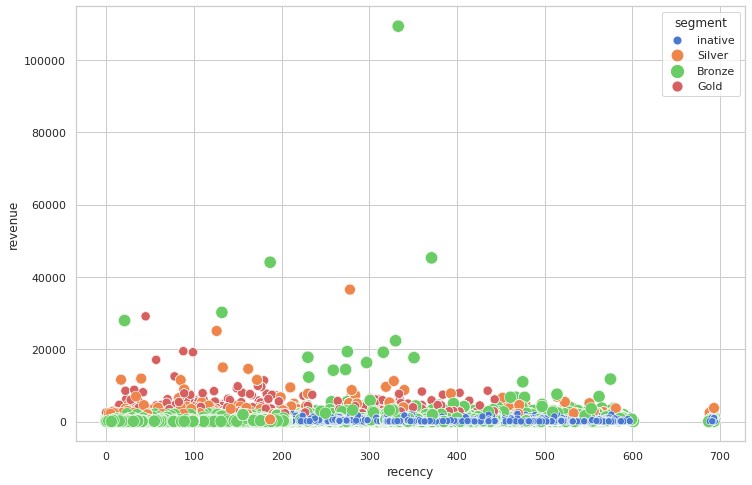

In [51]:
plot_segment('recency', 'revenue', data_final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


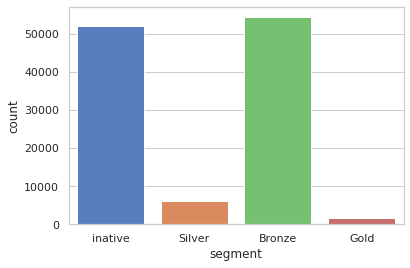

In [52]:
sns.countplot(data_final.segment)